# Import packages

In [84]:
import requests
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data generation

In [46]:
# As Random User Generator allows us to fetch up to 5,000 generated users 
#     in one request using the results parameter, we will use Random User Generator 2 times,
#     in every time

In [47]:
r_1 = requests.get('https://randomuser.me/api/?results=5000')

In [48]:
r_2 = requests.get('https://randomuser.me/api/?results=5000')

In [50]:
r_1.status_code

200

In [51]:
data_1 = r_1.json()
data_2 = r_2.json()

In [52]:
print('type -', type(data_1))
print('len -', len(data_1))

type - <class 'dict'>
len - 2


In [56]:
data_1.keys()

dict_keys(['results', 'info'])

In [57]:
print(len(data_1['results']))
print(len(data_1['info']))

5000
4


In [58]:
data_1['info']

{'seed': '7d5cdae4f8e3a0a3', 'results': 5000, 'page': 1, 'version': '1.3'}

In [59]:
data_1['results']

[{'gender': 'male',
  'name': {'title': 'Mr', 'first': 'Alexandre', 'last': 'Jones'},
  'location': {'street': {'number': 849, 'name': 'Concession Road 23'},
   'city': 'Dorchester',
   'state': 'Québec',
   'country': 'Canada',
   'postcode': 'P0S 1U1',
   'coordinates': {'latitude': '-59.9917', 'longitude': '-118.4968'},
   'timezone': {'offset': '+1:00',
    'description': 'Brussels, Copenhagen, Madrid, Paris'}},
  'email': 'alexandre.jones@example.com',
  'login': {'uuid': '177144d6-8bcf-441d-b9ea-5f6c9641eabf',
   'username': 'tinyostrich420',
   'password': 'maddog',
   'salt': 'FUW9rg2E',
   'md5': '58a8bacf1ae086bb2e2dd978e10d3677',
   'sha1': 'b05f4ce84009901de4ada4358efd272a499131ff',
   'sha256': 'cd10a895d3e4f93962ddd012434fe706f8f3a5ec0751a28ccd55db3682f04c95'},
  'dob': {'date': '1996-04-28T00:47:40.651Z', 'age': 25},
  'registered': {'date': '2008-12-08T10:01:22.967Z', 'age': 13},
  'phone': '642-096-7931',
  'cell': '678-811-0658',
  'id': {'name': '', 'value': None},
 

In [63]:
type(data_1['results'])

list

In [68]:
data = data_1['results'] + data_2['results']
len(data)

10000

# Data preprocessing

In [70]:
# Let's remove all duplicates if they exist
res = []
[res.append(x) for x in data if x not in res]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [71]:
len(res)

10000

In [73]:
# ⬆ there were not duplicates

In [74]:
data[0]

{'gender': 'male',
 'name': {'title': 'Mr', 'first': 'Alexandre', 'last': 'Jones'},
 'location': {'street': {'number': 849, 'name': 'Concession Road 23'},
  'city': 'Dorchester',
  'state': 'Québec',
  'country': 'Canada',
  'postcode': 'P0S 1U1',
  'coordinates': {'latitude': '-59.9917', 'longitude': '-118.4968'},
  'timezone': {'offset': '+1:00',
   'description': 'Brussels, Copenhagen, Madrid, Paris'}},
 'email': 'alexandre.jones@example.com',
 'login': {'uuid': '177144d6-8bcf-441d-b9ea-5f6c9641eabf',
  'username': 'tinyostrich420',
  'password': 'maddog',
  'salt': 'FUW9rg2E',
  'md5': '58a8bacf1ae086bb2e2dd978e10d3677',
  'sha1': 'b05f4ce84009901de4ada4358efd272a499131ff',
  'sha256': 'cd10a895d3e4f93962ddd012434fe706f8f3a5ec0751a28ccd55db3682f04c95'},
 'dob': {'date': '1996-04-28T00:47:40.651Z', 'age': 25},
 'registered': {'date': '2008-12-08T10:01:22.967Z', 'age': 13},
 'phone': '642-096-7931',
 'cell': '678-811-0658',
 'id': {'name': '', 'value': None},
 'picture': {'large': 'h

In [79]:
# let's create columns of our dataframe. We don't use all the information from 'data' list.
# For example, coordinates are not valuable information for future EDA.

gender = []
title = []
first_name = []
last_name = []
street_number = []
street_name = []
city = []
state = []
country = []
postcode = []
email = []
username = []
password = []
age = []
phone = []
cell = []
nat = []      # nat for nationality 

In [80]:
for i in data:
    gender.append(i['gender'])
    title.append(i['name']['title'])
    first_name.append(i['name']['first'])
    last_name.append(i['name']['last'])
    street_number.append(i['location']['street']['number'])
    street_name.append(i['location']['street']['name'])
    city.append(i['location']['city'])
    state.append(i['location']['state'])
    country.append(i['location']['country'])
    postcode.append(i['location']['postcode'])
    email.append(i['email'])
    username.append(i['login']['username'])
    password.append(i['login']['password'])
    age.append(i['dob']['age'])
    phone.append(i['phone'])
    cell.append(i['cell'])
    nat.append(i['nat'])

In [82]:
df = pd.DataFrame(list(zip(first_name,last_name,gender,title,age,nat,country,state,city,street_name,
                           street_number,postcode,phone,cell,email,username,password)),
                  columns = ['first_name','last_name','gender','title','age','nat','country','state','city',
                             'street_name','street_number','postcode','phone','cell','email','username','password'])

In [83]:
df

,first_name,last_name,gender,title,age,nat,country,state,city,street_name,street_number,postcode,phone,cell,email,username,password
0,Alexandre,Jones,male,Mr,25,CA,Canada,Québec,Dorchester,Concession Road 23,849,P0S 1U1,642-096-7931,678-811-0658,alexandre.jones@example.com,tinyostrich420,maddog
1,رادین,رضاییان,male,Mr,30,IR,Iran,قزوین,ایلام,شیخ فضل الله نوری,4573,78751,053-93743000,0948-117-3002,rdyn.rdyyn@example.com,beautifulostrich119,nights
2,Oliver,Moore,male,Mr,39,NZ,New Zealand,Bay of Plenty,Greymouth,Chatham Road,8591,19856,(050)-513-6797,(113)-855-1188,oliver.moore@example.com,smallrabbit461,zzzzz
3,Clara,Poulsen,female,Miss,51,DK,Denmark,Sjælland,Gl. Rye,Lucernevej,6968,56624,37056890,48288027,clara.poulsen@example.com,greengorilla665,cowboys1
4,Erin,West,female,Ms,27,IE,Ireland,Louth,Killarney,Pearse Street,3928,98940,071-514-4116,081-552-5835,erin.west@example.com,brownsnake173,tasha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Katrina,Black,female,Ms,68,US,United States,Washington,Louisville,Samaritan Dr,3202,75888,(073)-261-0952,(570)-049-0852,katrina.black@example.com,tinycat564,nanook
9996,Asher,Zhang,male,Mr,59,NZ,New Zealand,Otago,Rotorua,Cumberland Street,5371,52366,(375)-271-0405,(411)-890-1957,asher.zhang@example.com,heavyelephant704,cramps
9997,Vitali,Stief,male,Mr,49,DE,Germany,Berlin,Giengen an der Brenz,Hauptstraße,127,82859,0038-4517669,0172-2740192,vitali.stief@example.com,angryelephant184,goodgirl
9998,Nice,Gonçalves,female,Mrs,68,BR,Brazil,Paraná,Paulista,Rua Dezesseis de Maio,1390,29356,(51) 9986-6568,(27) 5364-0411,nice.goncalves@example.com,blackpeacock904,stanley


In [85]:
# So, our dataframe is ready ⬆

# EDA

In [88]:
df.head()

,first_name,last_name,gender,title,age,nat,country,state,city,street_name,street_number,postcode,phone,cell,email,username,password
0,Alexandre,Jones,male,Mr,25,CA,Canada,Québec,Dorchester,Concession Road 23,849,P0S 1U1,642-096-7931,678-811-0658,alexandre.jones@example.com,tinyostrich420,maddog
1,رادین,رضاییان,male,Mr,30,IR,Iran,قزوین,ایلام,شیخ فضل الله نوری,4573,78751,053-93743000,0948-117-3002,rdyn.rdyyn@example.com,beautifulostrich119,nights
2,Oliver,Moore,male,Mr,39,NZ,New Zealand,Bay of Plenty,Greymouth,Chatham Road,8591,19856,(050)-513-6797,(113)-855-1188,oliver.moore@example.com,smallrabbit461,zzzzz
3,Clara,Poulsen,female,Miss,51,DK,Denmark,Sjælland,Gl. Rye,Lucernevej,6968,56624,37056890,48288027,clara.poulsen@example.com,greengorilla665,cowboys1
4,Erin,West,female,Ms,27,IE,Ireland,Louth,Killarney,Pearse Street,3928,98940,071-514-4116,081-552-5835,erin.west@example.com,brownsnake173,tasha


In [89]:
# Let's check for missing values

df.isnull().sum()

first_name       0
last_name        0
gender           0
title            0
age              0
nat              0
country          0
state            0
city             0
street_name      0
street_number    0
postcode         0
phone            0
cell             0
email            0
username         0
password         0
dtype: int64

In [90]:
#  Let us check the data types of each attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   first_name     10000 non-null  object
 1   last_name      10000 non-null  object
 2   gender         10000 non-null  object
 3   title          10000 non-null  object
 4   age            10000 non-null  int64 
 5   nat            10000 non-null  object
 6   country        10000 non-null  object
 7   state          10000 non-null  object
 8   city           10000 non-null  object
 9   street_name    10000 non-null  object
 10  street_number  10000 non-null  int64 
 11  postcode       10000 non-null  object
 12  phone          10000 non-null  object
 13  cell           10000 non-null  object
 14  email          10000 non-null  object
 15  username       10000 non-null  object
 16  password       10000 non-null  object
dtypes: int64(2), object(15)
memory usage: 742.2+ KB


In [97]:
# Let's one more time drop duplicates, if they exist

len(df.drop_duplicates())

10000

In [98]:
# They don't exist. Everythin is fine. Let's move on.

In [99]:
# Let's get the number of unique values for each attribute

for col in df:
    print(col, '-', len(df[col].unique()))

first_name - 3315
last_name - 2606
gender - 2
title - 7
age - 55
nat - 17
country - 17
state - 544
city - 3413
street_name - 2425
street_number - 6348
postcode - 9644
phone - 9998
cell - 10000
email - 9748
username - 9927
password - 5608


### <span style="color:green">Gender</span>

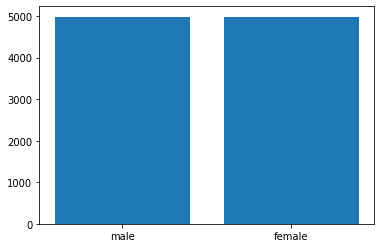

In [126]:
x = np.array(["male", "female"])
y = np.array([len(df[df['gender'] == 'female']),len(df[df['gender'] == 'female'])])

plt.bar(x,y)
plt.show()

In [121]:
# Males and females are almost equal

print(x[0],'-',y[0])
print(x[1],'-',y[1])

male - 4985
female - 4985


### <span style="color:green">Title</span>

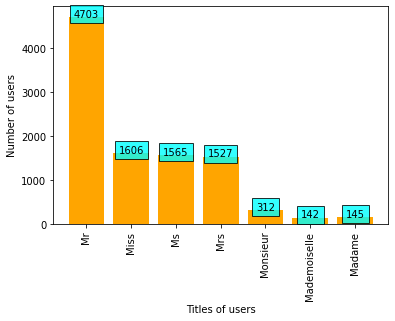

In [223]:
# Function to add value labels

def valuelabel(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center',
                 bbox = dict(facecolor = 'cyan', alpha =0.8))
        
# Main function
  
    
# Define data
x = df['title'].unique()
y = np.array([len(df[df['title'] == i]) for i in x])



# Plot bar chart
plt.bar(x, y, color= 'orange')

# Call function
valuelabel(x, y)       

# Define labels
plt.xlabel("Titles of users")
plt.ylabel("Number of users")

plt.xticks(rotation=90)

# Display plot
plt.show()

In [195]:
# Here, we see that among users most of them are have 'Mr' title and the least of them have 'Mademoiselle' title.

### <span style="color:green">Age</span>

In [208]:
df['age'].describe()

count    10000.000000
mean        49.997800
std         15.562526
min         23.000000
25%         37.000000
50%         50.000000
75%         63.000000
max         77.000000
Name: age, dtype: float64

### <span style="color:green">Country, state</span>

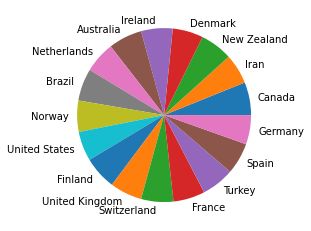

In [227]:
x = df['country'].unique()
y = np.array([len(df[df['country'] == i]) for i in x])

plt.pie(y, labels = x)
plt.show() 

In [228]:
# Here we see that all 10000 users are almost equally distributed amoung 17 countries

In [259]:
by_countries_states = df.groupby(['country','state']).count()[['first_name']]

In [260]:
by_countries_states

first_name
country        state                                   
Australia      Australian Capital Territory          87
               New South Wales                      101
               Northern Territory                    68
               Queensland                            63
               South Australia                       68
               Tasmania                              71
               Victoria                              91
               Western Australia                     76
Brazil         Acre                                  17
               Alagoas                               21
               Amapá                                 19
               Amazonas                              26
               Bahia                                 21
               Ceará                                 21
               Distrito Federal                      23
               Espírito Santo                        17
               Goiás                                 22
               Maranhão                              25
               Mato Grosso                           32
               Mato Grosso do Sul                    22
               Minas Gerais                          23
               Paraná                                18
               Paraíba                               27
               Pará                                  37
               Pernambuco                            22
               Piauí                                 23
               Rio Grande do Norte                   26
               Rio Grande do Sul                     15
               Rio de Janeiro                        25
               Rondônia                              14
               Roraima                               26
               Santa Catarina                        22
               Sergipe                               19
               São Paulo                             20
               Tocantins                             16
Canada         Alberta                               48
               British Columbia                      39
               Manitoba                              61
               New Brunswick                         57
               Newfoundland and Labrador             52
               Northwest Territories                 44
               Nova Scotia                           38
               Nunavut                               52
               Ontario                               43
               Prince Edward Island                  34
               Québec                                46
               Saskatchewan                          57
               Yukon                                 40
Denmark        Danmark                               91
               Hovedstaden                           98
               Midtjylland                           86
               Nordjylland                           99
               Sjælland                             100
               Syddanmark                            95
Finland        Central Finland                       29
               Central Ostrobothnia                  24
               Finland Proper                        36
               Kainuu                                30
               Kymenlaakso                           23
               Lapland                               33
               North Karelia                         32
               Northern Ostrobothnia                 37
               Northern Savonia                      28
               Ostrobothnia                          29
               Pirkanmaa                             40
               Päijät-Häme                           32
               Satakunta                             35
               South Karelia                         37
               Southern Ostrobothnia                 32
               Southern Savonia                      36
             

In [261]:
by_countries_states[by_countries_states['first_name'] == by_countries_states['first_name'].min()]

first_name
country        state                   
France         Bas-Rhin               1
               Vaucluse               1
Turkey         Giresun                1
United Kingdom Lincolnshire           1

In [262]:
by_countries_states[by_countries_states['first_name'] == by_countries_states['first_name'].max()]

,,first_name
country,state,
Australia,New South Wales,101


In [263]:
# Here we see that the states with the least users are Bas-Rhin, Vaucluse, Giresun, Lincolnshire
#           and the only state with the most users is New South Wales in Australia

### <span style="color:green">Country, gender</span>

In [265]:
by_countries_gender = df.groupby(['country','gender']).count()[['first_name']]

In [266]:
by_countries_gender

first_name
country        gender            
Australia      female         330
               male           295
Brazil         female         297
               male           302
Canada         female         305
               male           306
Denmark        female         285
               male           284
Finland        female         308
               male           308
France         female         291
               male           297
Germany        female         271
               male           273
Iran           female         253
               male           305
Ireland        female         298
               male           289
Netherlands    female         287
               male           293
New Zealand    female         294
               male           308
Norway         female         302
               male           279
Spain          female         286
               male           298
Switzerland    female         287
               male           312
Turkey         female         324
               male           287
United Kingdom female         274
               male           323
United States  female         293
               male           256

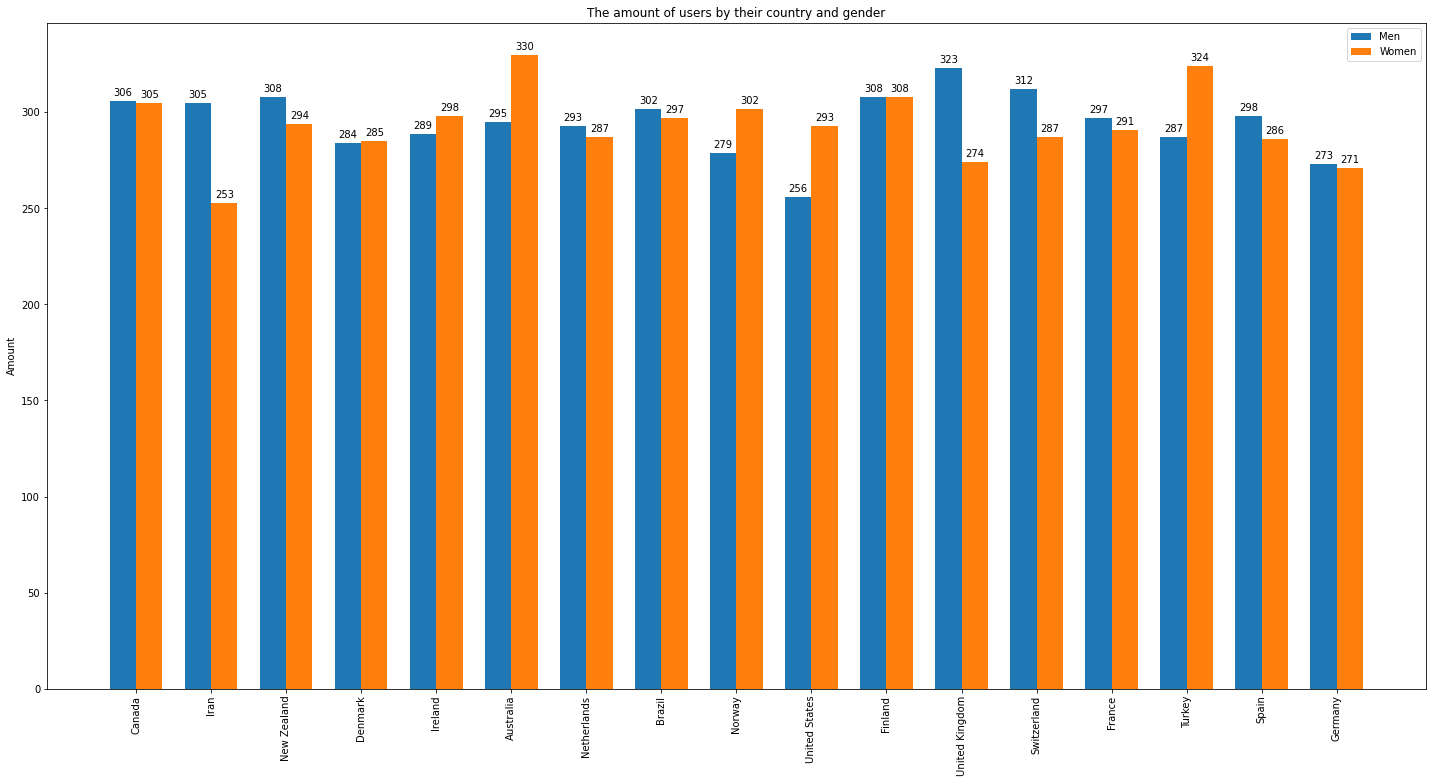

In [298]:
labels = df['country'].unique()
male = [by_countries_gender.loc[i].loc['male'][0] for i in labels]
female = [by_countries_gender.loc[i].loc['female'][0] for i in labels]

plt.rcParams["figure.figsize"] = (20,10)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male, width, label='Men')
rects2 = ax.bar(x + width/2, female, width, label='Women')

ax.set_ylabel('Amount')
ax.set_title('The amount of users by their country and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [299]:
# I introduced the most interesting feature analysis of my dataframe.

# <span style="color:red">Conclusion</span>

### 1) There are almost equal number of males and females
### 2) From 10000 users 4703 (47%) have 'Mr' title and 142(1.42%) have 'Mademoiselle' title 
### 3) The youngest user is 23 years old, and the oldest user is 77 years old
### 4) All 10000 users are almost equally distributed amoung 17 countries
### 5) # Here we see that the states with the least users are Bas-Rhin, Vaucluse, Giresun, Lincolnshire and the only state with the most users is New South Wales in Australia

# <span style="color:red">Thank you</span>